# <center style="background-color:black;padding:50px;border-radius:23px;"><span style="margin:5px;color:white; font-family:verdana;font-size:20px;letter-spacing:12px;word-spacing:20px"><span style="border-radius:23px; padding:0 15px;color:#42adf5;background-color:black;font-size:60px;">Video GAMES Sales</span><br> <BR> Data Analysis and Visualization</span> </center>

## **<p style="color:#42adf5;font-family:verdana;">Importing the required libraries :</p>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **<p style="color:#42adf5;font-family:verdana;">Storing the dataset as a dataframe :</p>**

In [2]:
games = pd.read_csv("games.csv")

<hr noshade style="height:2px;">

# <center><span style="color:#42adf5;font-family:verdana;font-size:35px;border-bottom:3px solid">Data Description</span></center>

###   <span style=" color:#42adf5;font-family:verdana;"><i>First 10 rows in the dataset are :</i><span>

In [4]:
games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
print('\033[1m'+'Shape of Dataset is : ',games.shape)
(rows, cols) = games.shape
print("Thus, the dataset has : \n",rows,' Rows\n',cols,' Columns')

Shape of Dataset is :  (16598, 11)
Thus, the dataset has : 
 16598  Rows
 11  Columns


###   <span style="  color:#42adf5;font-family:verdana;"><i>Information about the Games dataset :</i></span>

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<hr noshade style="height:2px;">

# <center><span style=" color:#42adf5;font-family:verdana;font-size:35px;border-bottom:3px solid;">Handling Missing Values</span></center>

###  <span style="color:#42adf5;font-family:verdana;"><i>Total number of null values in each column is/are :</i></span>

In [7]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### <span style=" color:#42adf5;font-family:verdana;"><i>Checking the percentange of null values in each column is :</i></span>

In [8]:
for col in games.columns:
    null = games[col].isnull().sum()
    percentage = (null/len(games))*100
    print(col,":", percentage,"%")

Rank : 0.0 %
Name : 0.0 %
Platform : 0.0 %
Year : 1.6327268345583803 %
Genre : 0.0 %
Publisher : 0.3494396915290999 %
NA_Sales : 0.0 %
EU_Sales : 0.0 %
JP_Sales : 0.0 %
Other_Sales : 0.0 %
Global_Sales : 0.0 %


### <span style=" color:#42adf5;font-family:verdana;"><i>Replacing the null values:</i></span>

In [9]:
games['Year'].fillna(value='Not Known', inplace=True)
games['Publisher'].fillna(value='Not Known', inplace=True)

### <span style=" color:#42adf5;font-family:verdana;"><i>Checking the null values:</i></span>

In [10]:
games.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
# Converting appropriate columns to category type.
games = games.astype({'Genre': 'category'})

# <center><span style=" color:#42adf5;font-family:verdana;font-size:35px;border-bottom:3px solid;">Visualization of the Dataset</span></center>

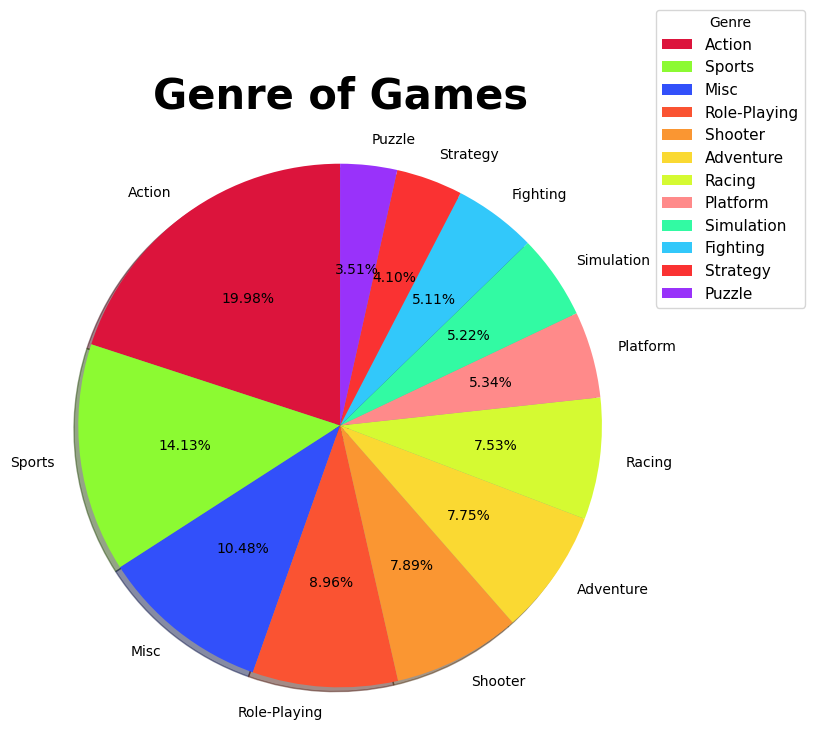

In [12]:
#getting the genres 
genreCount=games["Genre"].value_counts()
pieLabels=genreCount.index.tolist()
#plotting Pie Chart
plt.figure(figsize = (10,5))
plt.pie(genreCount, 
        labels=pieLabels,
        shadow=True, 
        radius= 1.7, 
        colors = ["#DC143C","#8cfa32","#3250fa","#fa5332","#fa9632","#fad932","#d5fa32","#ff8a8a","#32faa3","#32c8fa","#fa3232","#9932fa"], 
        startangle=90, 
        autopct= "%0.2f%%")
plt.legend(pieLabels, fontsize=11,
          title ="Genre",
          loc ="upper left",
          bbox_to_anchor =(1.3, 0.5, 2.5, 1.1))
plt.title('Genre of Games',fontsize = 30, fontweight = 'bold',loc='center', pad=90)
plt.show()

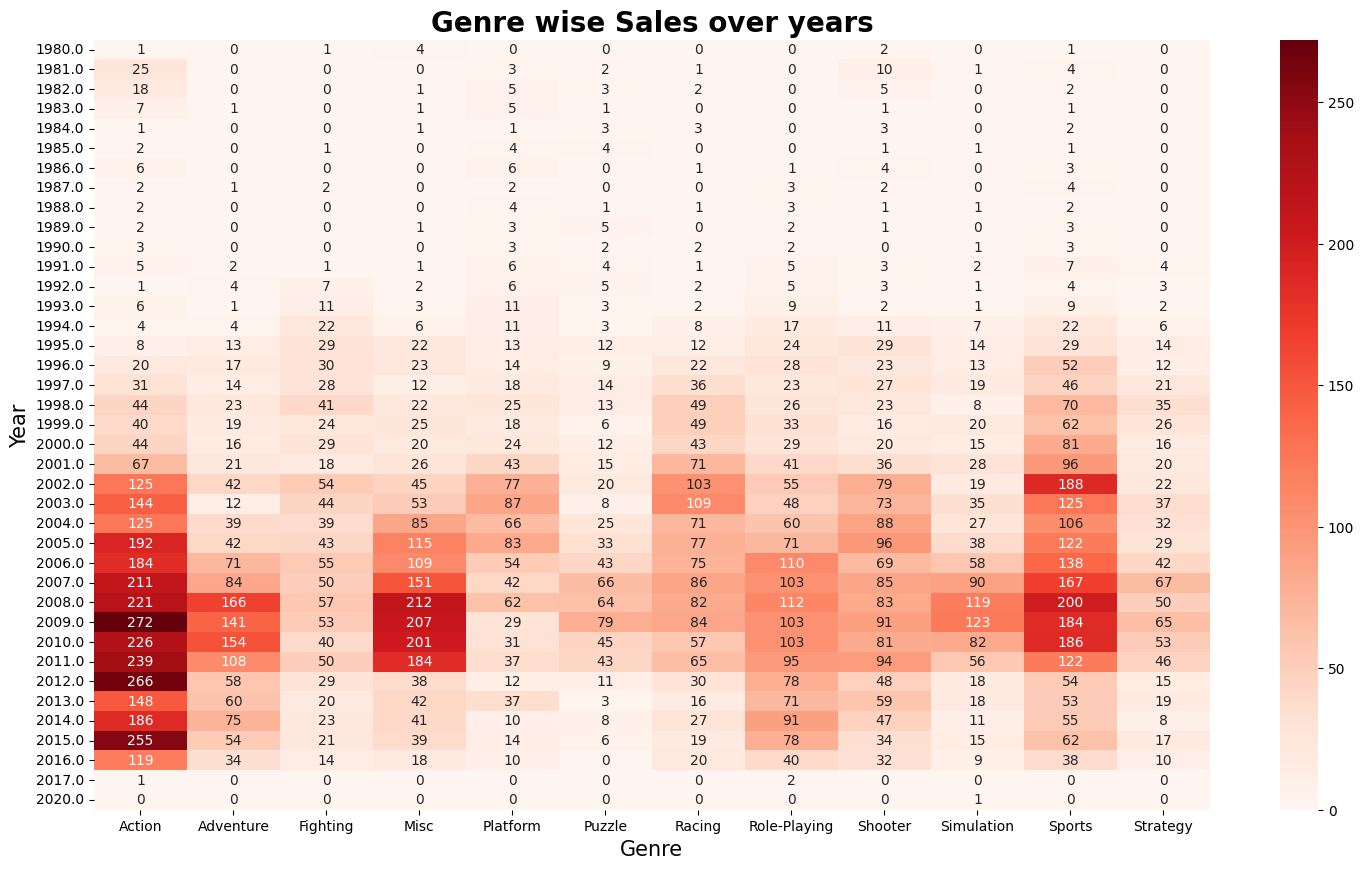

In [18]:
grouped = games.groupby('Year')['Genre'].value_counts().unstack()
grouped.drop(["Not Known"],inplace=True)

#plotting heatmap
plt.figure(figsize=(18,10))
ax = sns.heatmap(grouped, annot=True, fmt="d", cmap='Reds')
plt.ylabel('Year',fontsize = 15)
plt.xlabel('Genre',fontsize = 15)
plt.title('Genre wise Sales over years',fontsize = 20, fontweight = 'bold')
plt.show()

<Figure size 1000x500 with 0 Axes>

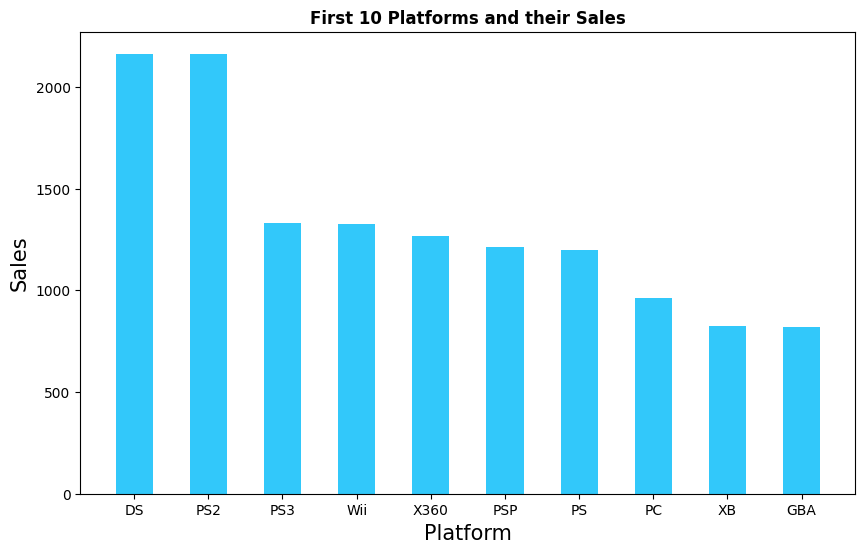

In [21]:
platform=games["Platform"].value_counts().head(10)

#plotting bar graph
plt.figure(figsize = (10,5))
fig = plt.subplots(figsize =(10, 6))
p1 = plt.bar(platform.index, platform, 0.5, color='#32c8fa')
plt.ylabel('Sales',fontsize = 15)
plt.xlabel('Platform',fontsize = 15)
plt.title('First 10 Platforms and their Sales',fontsize = 12, fontweight = 'bold')
plt.show()

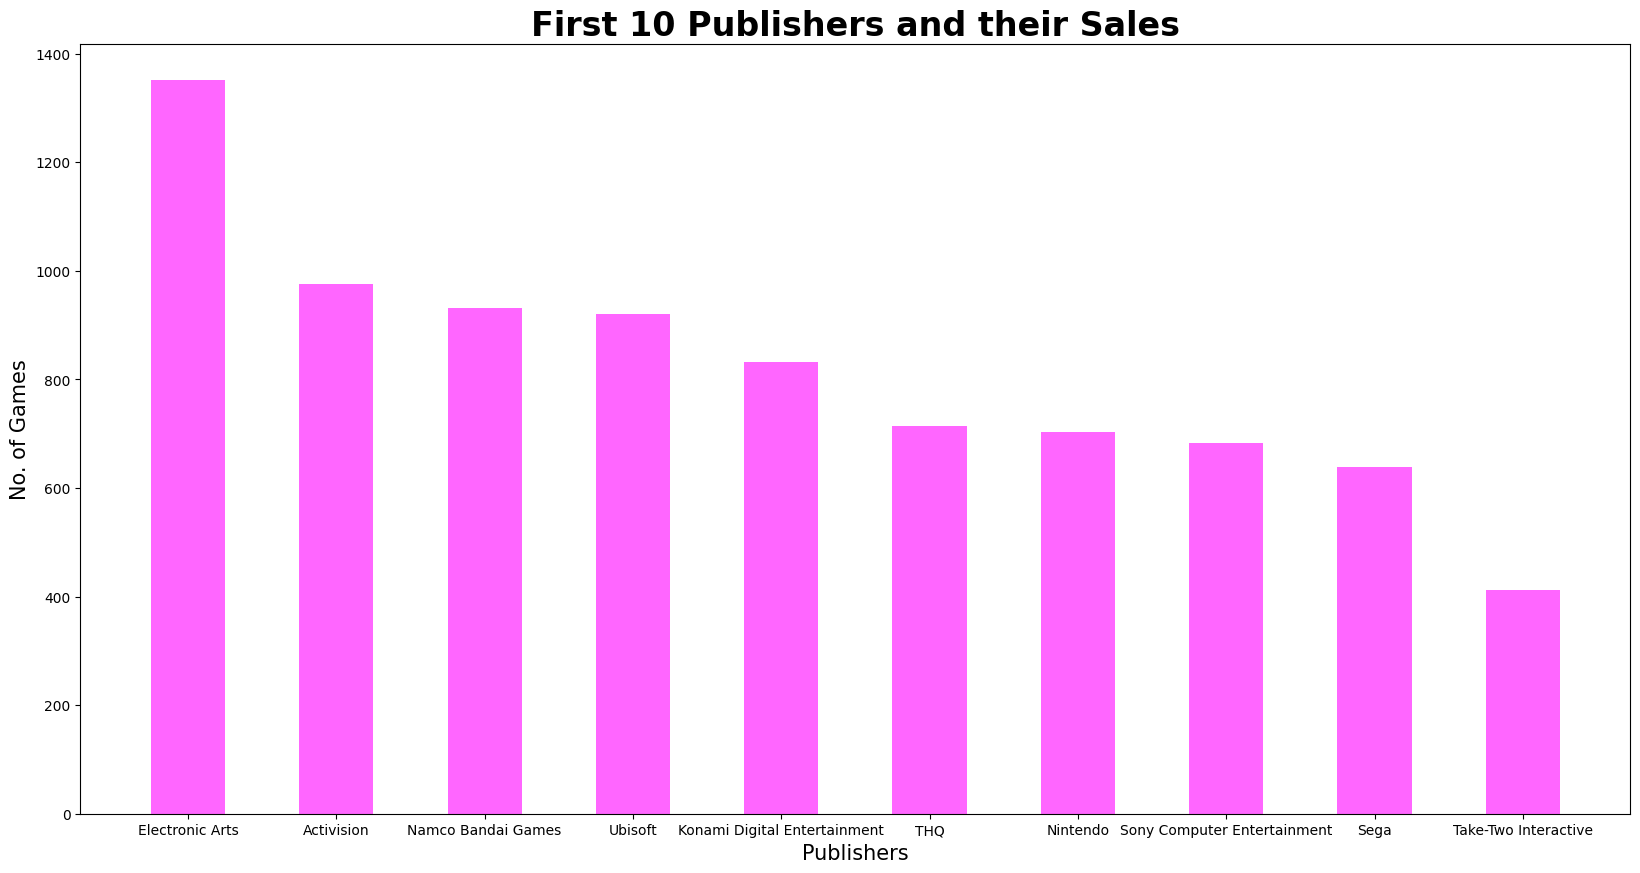

In [22]:
publisher=games["Publisher"].value_counts().head(10)

#plotting
fig = plt.subplots(figsize =(20, 10))
p2=plt.bar(publisher.index,publisher,0.5,color='#FF66fF')
plt.ylabel('No. of Games',fontsize = 15)
plt.xlabel('Publishers',fontsize = 15)
plt.title('First 10 Publishers and their Sales',fontsize = 24, fontweight = 'bold')
plt.show()


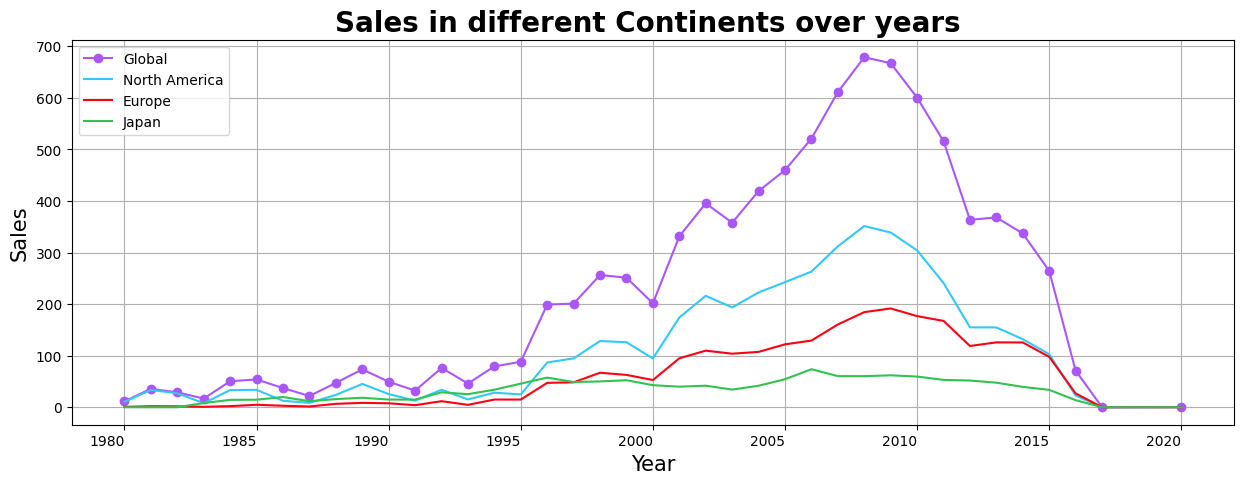

In [24]:
grouped = games.groupby('Year').sum(numeric_only=True)
grouped.drop(["Not Known"],inplace=True)

# Plotting
plt.figure(figsize = (15,5))
plt.plot(grouped['Global_Sales'], marker='o', color="#AA57fa")
plt.plot(grouped["NA_Sales"],  color="#32c8fa")
plt.plot(grouped['EU_Sales'],  color="#FF0012")
plt.plot(grouped['JP_Sales'],  color="#31C24F")
plt.xlabel("Year",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xticks(size = 10, ha="right")
plt.yticks(size = 10)
plt.title('Sales in different Continents over years ', fontsize=20, fontweight="bold")
plt.legend(["Global",'North America','Europe',"Japan"], loc='upper left')
plt.grid()
plt.show()